[-5.551115123125783e-17, 0.7808039471495114, 1.679901550734656, -5.551115123125783e-17, 0.7808039471495114, 1.679901550734656, -5.551115123125783e-17, 0.5908893957261211, 1.6620339669185566, -5.551115123125783e-17, 0.7808039471495114, 1.679901550734656]
forward kin FR: [10.000000000000028, 104.0, -200.0]
forward kin FL: [10.000000000000028, 104.0, -200.0]
forward kin BR: [-29.99999999999997, 104.0, -200.0]
forward kin BL: [10.000000000000028, 104.0, -200.0]
FR leg endEffector position: (10.0, -104.0, -200.0)
FL leg endEffector position: (10.0, 104.0, -200.0)
BR leg endEffector position: (-30.0, -104.0, -200.0)
BL leg endEffector position: (10.0, 104.0, -200.0)


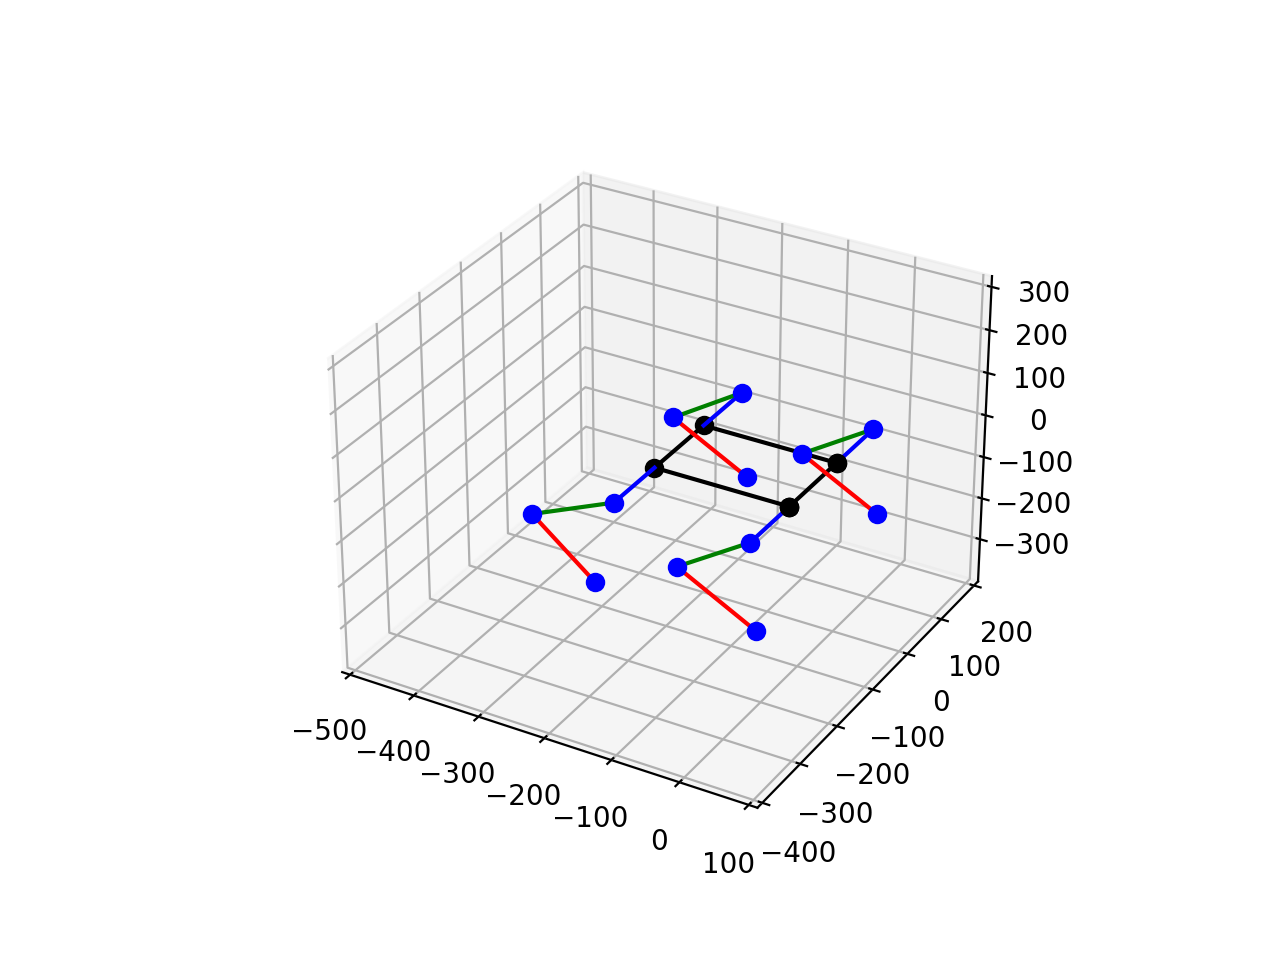

In [7]:
%matplotlib widget
import math
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

L1 = 104
L2 = 150
L3 = 150
J3_min = 30*np.pi/180
J3_max = 170*np.pi/180

class Point:
    def __init__(self):
        self.x:float
        self.y:float
        self.z:float

class JointAngles:
    def __self__(self):
        self.FR = np.zeros([3])
        self.FL = np.zeros([3])
        self.BR = np.zeros([3])
        self.BL = np.zeros([3])

class EndEffectorPosition:
    def __init__(self):
        self.FR = Point()
        self.FL = Point()
        self.BR = Point()
        self.BL = Point()


class HyperDog_Kinematics():
    def __init__(self, L1, L2, L3, L, W):
        self.L1 = L1
        self.L2 = L2
        self.L3 = L3
        self.L = L # body len
        self.W = W # body width


    def fk_EF(self, angs:np.ndarray):
        x = -self.L2*np.cos(angs[1]) \
            -self.L3*np.cos(angs[1]+angs[2])

        y =  self.L1*np.cos(angs[0]) \
            -self.L2*np.sin(angs[1])*np.sin(angs[0]) \
            -self.L3*np.sin(angs[1]+angs[2])*np.sin(angs[0])

        z = -self.L1*np.sin(angs[0]) \
            -self.L2*np.sin(angs[1])*np.cos(angs[0]) \
            -self.L3*np.sin(angs[1]+angs[2])*np.cos(angs[0])
        return [x, y, z]


    def ik(self, p:np.ndarray):
        r_yz = np.sqrt(p.y**2 + p.z**2)
        sin_th1_plus_alpha = self.L1/r_yz
        # cos_th1_plus_alpha = np.sqrt(r_yz**2 - self.L1**2) / r_yz
        cos_th1_plus_alpha = np.sqrt(1 - sin_th1_plus_alpha**2)
        th1 = np.arctan2(sin_th1_plus_alpha, cos_th1_plus_alpha) - np.arctan2(p.y, -p.z)
        # cos_alpha_minus_th1 = L1/(np.sqrt(p.y**2 + p.z**2))
        # sin_alpha_minus_th1 = np.sqrt(1 - cos_alpha_minus_th1**2)
        # alpha = np.arctan2(-p.z, p.y)
        # th1 = alpha - np.arctan2(sin_alpha_minus_th1, cos_alpha_minus_th1)
        # ------------------------
        cos_th3 = (p.x**2 + p.y**2 + p.z**2 - self.L1**2 -self.L2**2 - self.L3**2)/(2*self.L2*self.L3)
        sin_th3 = np.sqrt(1 - cos_th3**2)
        th3 = np.arctan2(sin_th3, cos_th3)  # leg config 1
        # th3 = np.arctan2(-sin_th3, cos_th3)  # Leg config 2
        # ------------------------
        a = self.L3*np.sin(th3)
        b = self.L2 + self.L3*np.cos(th3)
        c = np.sqrt(a**2 + b**2)
        beta = np.arctan2(b, a)
        sin_th2_minus_beta = p.x/c
        cos_th2_minus_beta = np.sqrt( 1 - (p.x/c)**2)
        th2_minus_beta = np.arctan2(sin_th2_minus_beta, cos_th2_minus_beta)
        th2 = th2_minus_beta + beta
        return [th1, th2, th3]

    def plotLeg(self, angs:list):

        fig = plt.figure(dpi=200)
        ax = plt.axes(projection="3d")
        # body
        ax.plot3D([0, -self.L], [0, 0], [0, 0], '-k')
        ax.plot(-self.L,0,0, 'ko')
        ax.plot3D([0, 0], [0, -self.W], [0, 0], '-k')
        ax.plot(0,-self.W,0, 'ko')
        ax.plot3D([-self.L, 0], [-self.W, -self.W], [0, 0], '-k')
        ax.plot(-self.L,-self.W,0, 'ko')    
        # plot body
        ax.plot3D([-self.L, -self.L], [0, -self.W], [0, 0], '-k')

        #  leg FR
        angs_FR = angs[:3]
        l1_x1 = 0
        l2_x1 = -float(f"{self.L2*np.cos(angs_FR[1]):.8f}") + l1_x1
        l3_x1 = -float(f"{self.L3*np.cos(angs_FR[1] + angs_FR[2]):.8f}") + l2_x1
        # ---
        l1_y1 = -float(f"{self.L1*np.cos(angs_FR[0]):.4f}")
        l2_y1 = +float(f"{self.L2*np.sin(angs_FR[1])*np.sin(angs_FR[0]):.8f}") + l1_y1
        l3_y1 = +float(f"{self.L3*np.sin(angs_FR[1] + angs_FR[2])*np.sin(angs_FR[0]):.8f}") + l2_y1
        # ---
        l1_z1 = -float(f"{self.L1*np.sin(angs_FR[0]):.4f}")
        l2_z1 = -float(f"{self.L2*np.sin(angs_FR[1])*np.cos(angs_FR[0]):.8f}") + l1_z1
        l3_z1 = -float(f"{self.L3*np.sin(angs_FR[1] + angs_FR[2])*np.cos(angs_FR[0]):.8f}") + l2_z1
        # ---
        print(f"FR leg endEffector position: {l3_x1, l3_y1, l3_z1}")
        # plot leg FL
        ax.plot3D([0, l1_x1], [-self.W, l1_y1-self.W], [0, l1_z1], '-b')
        ax.plot3D([l1_x1, l2_x1], [l1_y1-self.W, l2_y1-self.W], [l1_z1, l2_z1], '-g')
        ax.plot3D([l2_x1, l3_x1], [l2_y1-self.W, l3_y1-self.W], [l2_z1, l3_z1], '-r')
        ax.plot(0,-self.W,0, 'ko')
        ax.plot(l1_x1,l1_y1-self.W, l1_z1, 'bo')
        ax.plot(l2_x1,l2_y1-self.W, l2_z1, 'bo')
        ax.plot(l3_x1,l3_y1-self.W, l3_z1, 'bo')

        # FL leg
        angs_FL = angs[3:6]
        l1_x2 = 0
        l2_x2 = -float(f"{self.L2*np.cos(angs_FL[1]):.8f}") + l1_x2
        l3_x2 = -float(f"{self.L3*np.cos(angs_FL[1] + angs_FL[2]):.8f}") + l2_x2
        # ---
        l1_y2 =  float(f"{self.L1*np.cos(angs_FL[0]):.4f}")
        l2_y2 = -float(f"{self.L2*np.sin(angs_FL[1])*np.sin(angs_FL[0]):.8f}") + l1_y2
        l3_y2 = -float(f"{self.L3*np.sin(angs_FL[1] + angs_FL[2])*np.sin(angs_FL[0]):.8f}") + l2_y2
        # ---
        l1_z2 = -float(f"{self.L1*np.sin(angs_FL[0]):.4f}")
        l2_z2 = -float(f"{self.L2*np.sin(angs_FL[1])*np.cos(angs[0]):.8f}") + l1_z2
        l3_z2 = -float(f"{self.L3*np.sin(angs_FL[1] + angs_FL[2])*np.cos(angs_FL[0]):.8f}") + l2_z2
        # ---
        print(f"FL leg endEffector position: {l3_x2, l3_y2, l3_z2}")
        # plot leg FL
        ax.plot3D([0, l1_x2], [0, l1_y2], [0, l1_z2], '-b')
        ax.plot3D([l1_x2, l2_x2], [l1_y2, l2_y2], [l1_z2, l2_z2], '-g')
        ax.plot3D([l2_x2, l3_x2], [l2_y2, l3_y2], [l2_z2, l3_z2], '-r')
        ax.plot(0,0,0, 'ko')
        ax.plot(l1_x2,l1_y2, l1_z2, 'bo')
        ax.plot(l2_x2,l2_y2, l2_z2, 'bo')
        ax.plot(l3_x2,l3_y2, l3_z2, 'bo')
        
        #  leg BR
        angs_BR = angs[6:9]
        l1_x3 = 0
        l2_x3 = -float(f"{self.L2*np.cos(angs_BR[1]):.8f}") + l1_x3
        l3_x3 = -float(f"{self.L3*np.cos(angs_BR[1] + angs_BR[2]):.8f}") + l2_x3
        # ---
        l1_y3 = -float(f"{self.L1*np.cos(angs_BR[0]):.4f}")
        l2_y3 = +float(f"{self.L2*np.sin(angs_BR[1])*np.sin(angs_BR[0]):.8f}") + l1_y3
        l3_y3 = +float(f"{self.L3*np.sin(angs_BR[1] + angs_BR[2])*np.sin(angs_BR[0]):.8f}") + l2_y3
        # ---
        l1_z3 = -float(f"{self.L1*np.sin(angs_BR[0]):.4f}")
        l2_z3 = -float(f"{self.L2*np.sin(angs_BR[1])*np.cos(angs_BR[0]):.8f}") + l1_z2
        l3_z3 = -float(f"{self.L3*np.sin(angs_BR[1] + angs_BR[2])*np.cos(angs_BR[0]):.8f}") + l2_z3
        # ---
        print(f"BR leg endEffector position: {l3_x3, l3_y3, l3_z3}")
        # plot leg FL
        ax.plot3D([-self.L, l1_x3-self.L], [-self.W, l1_y3-self.W], [0, l1_z3], '-b')
        ax.plot3D([l1_x3-self.L, l2_x3-self.L], [l1_y3-self.W, l2_y3-self.W], [l1_z3, l2_z3], '-g')
        ax.plot3D([l2_x3-self.L, l3_x3-self.L], [l2_y3-self.W, l3_y3-self.W], [l2_z3, l3_z3], '-r')
        ax.plot(0,-self.W,0, 'ko')
        ax.plot(l1_x3-self.L,l1_y3-self.W, l1_z3, 'bo')
        ax.plot(l2_x3-self.L,l2_y3-self.W, l2_z3, 'bo')
        ax.plot(l3_x3-self.L,l3_y3-self.W, l3_z3, 'bo')
        
        # leg BL
        angs_BL = angs[9:12]
        l1_x4 = 0
        l2_x4 = -float(f"{self.L2*np.cos(angs_BL[1]):.8f}") + l1_x4
        l3_x4 = -float(f"{self.L3*np.cos(angs_BL[1] + angs_BL[2]):.8f}") + l2_x4
        # ---
        l1_y4 =  float(f"{self.L1*np.cos(angs_BL[0]):.4f}")
        l2_y4 = -float(f"{self.L2*np.sin(angs_BL[1])*np.sin(angs_BL[0]):.8f}") + l1_y4
        l3_y4 = -float(f"{self.L3*np.sin(angs_BL[1] + angs_BL[2])*np.sin(angs_BL[0]):.8f}") + l2_y4
        # ---
        l1_z4 = -float(f"{self.L1*np.sin(angs_BL[0]):.4f}")
        l2_z4 = -float(f"{self.L2*np.sin(angs_BL[1])*np.cos(angs[0]):.8f}") + l1_z4
        l3_z4 = -float(f"{self.L3*np.sin(angs_BL[1] + angs_BL[2])*np.cos(angs_BL[0]):.8f}") + l2_z4
        # ---
        print(f"BL leg endEffector position: {l3_x4, l3_y4, l3_z4}")
        # plot leg FL
        ax.plot3D([-self.L, l1_x4-self.L], [0, l1_y4], [0, l1_z4], '-b')
        ax.plot3D([l1_x4-self.L, l2_x4-self.L], [l1_y4, l2_y4], [l1_z4, l2_z4], '-g')
        ax.plot3D([l2_x4-self.L, l3_x4-self.L], [l2_y4, l3_y4], [l2_z4, l3_z4], '-r')
        ax.plot(0,0,0, 'ko')
        ax.plot(l1_x4-self.L,l1_y4, l1_z4, 'bo')
        ax.plot(l2_x4-self.L,l2_y4, l2_z4, 'bo')
        ax.plot(l3_x4-self.L,l3_y4, l3_z4, 'bo')
    
        # ---
        ax.set_xlim(-500, 100)
        ax.set_ylim(-400, 200)
        ax.set_zlim(-390, 310)




EF = EndEffectorPosition()
angs = JointAngles()

EF.FR.x = 10
EF.FR.y = 104
EF.FR.z = -200

EF.FL.x = 10
EF.FL.y = 104
EF.FL.z = -200

EF.BR.x = -30
EF.BR.y = 104
EF.BR.z = -200

EF.BL.x = 10
EF.BL.y = 104
EF.BL.z = -200


kin = HyperDog_Kinematics(L1, L2, L3, L = 200, W = 130)


angs = kin.ik(EF.FR) + kin.ik(EF.FL) + kin.ik(EF.BR) + kin.ik(EF.BL)
# angs[1] = angs[1] - 130*np.pi/180
# angs = np.array([40,90,90])*np.pi/180
print(angs)
print(f"forward kin FR: {kin.fk_EF(angs[:3])}")
print(f"forward kin FL: {kin.fk_EF(angs[3:6])}")
print(f"forward kin BR: {kin.fk_EF(angs[6:9])}")
print(f"forward kin BL: {kin.fk_EF(angs[9:12])}")

# angs = np.array([th0, th1, th1-th2])*np.pi/180
kin.plotLeg(angs)

